In [6]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
traindata = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
evaldata = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

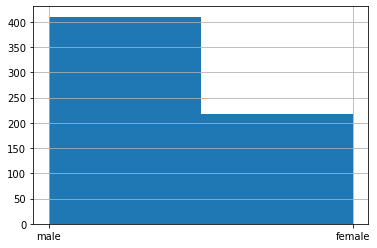

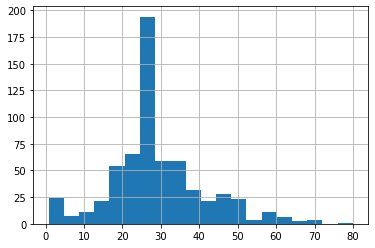

In [8]:

#plt.plot(
plt.subplot(traindata.sex.hist(bins=2))
plt.show()
plt.subplot(traindata.age.hist(bins=20))
plt.show()


#print(traindata.describe())

y_train = traindata.pop('survived')
y_eval = evaldata.pop('survived')

#print(traindata, '\n', evaldata)


In [9]:
print(traindata.head)

<bound method NDFrame.head of         sex   age  n_siblings_spouses  parch     fare   class     deck  \
0      male  22.0                   1      0   7.2500   Third  unknown   
1    female  38.0                   1      0  71.2833   First        C   
2    female  26.0                   0      0   7.9250   Third  unknown   
3    female  35.0                   1      0  53.1000   First        C   
4      male  28.0                   0      0   8.4583   Third  unknown   
..      ...   ...                 ...    ...      ...     ...      ...   
622    male  28.0                   0      0  10.5000  Second  unknown   
623    male  25.0                   0      0   7.0500   Third  unknown   
624  female  19.0                   0      0  30.0000   First        B   
625  female  28.0                   1      2  23.4500   Third  unknown   
626    male  32.0                   0      0   7.7500   Third  unknown   

     embark_town alone  
0    Southampton     n  
1      Cherbourg     n  
2    S

In [10]:
categories = traindata.columns.values.tolist()
print(categories)

['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']


In [11]:

#print(traindata.dtypes)

numerical = []
literal = []

for category, type in zip(categories, traindata.dtypes):
    #
    s=str(type)
    if "int" in s or "float" in s:
        numerical.append(category)
    else:
        literal.append(category)

#print(numerical, literal)


feature_cols = []

for feature in literal:
    vocabulary = traindata[feature].unique()
    print(vocabulary)
    feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocabulary))

for feature in numerical:
    feature_cols.append(tf.feature_column.numeric_column(feature, dtype=tf.float64))

print(feature_cols)

#for category in categories:
#    print(category, type(traindata[category]))

['male' 'female']
['Third' 'First' 'Second']
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericCo

In [34]:
def get_input_func(data, labels, epochs=20, shuffle=True, batches=50):
    def input_func():
        ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batches).repeat(epochs)
        return ds
    return input_func

In [35]:

train_func = get_input_func(traindata, y_train)
eval_func = get_input_func(evaldata, y_eval, epochs=1, shuffle=False)

In [41]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_cols)
linear_est.train(train_func)
result = linear_est.evaluate(eval_func)


#clear_output()

os.system('clear')

print(result)

get_prediction = list(linear_est.predict(eval_func))
print(get_prediction[0])



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Stefan\\AppData\\Local\\Temp\\tmpj_2mp5hc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, 